In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
df  = pd.read_csv('/content/drive/MyDrive/Python_google_colab/train_EDA_FS_file.csv')

In [4]:
df.head()

,Unnamed: 0,Id,SalePrice,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,...,Fence,MiscFeature,SaleType,SaleCondition,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,0,1,12.247694,0.75,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.208333,0.250,0.285714,0.0,0.714286,0.2,0.142857,0.857143,0.866667,0.25,0.666667,1.0,0.4,0.50,0.75,0.75,0.333333,0.833333,0.2,0.0,1.0,0.8,0.666667,1.0,1.0,0.166667,0.333333,0.8,0.8,...,1.0,1.0,1.0,0.8,0.235294,0.418208,0.366344,0.666667,0.500,0.036765,0.098361,0.12250,0.125089,0.0,0.064212,0.140098,0.356155,0.413559,0.0,0.577712,0.333333,0.0,0.666667,0.5,0.375,0.333333,0.500000,0.000000,0.046729,0.50,0.386460,0.000000,0.111517,0.000000,0.0,0.0,0.0,0.0,0.090909,0.50
1,1,2,12.109011,0.75,1.0,1.0,1.0,1.0,0.0,0.5,0.0,1.000000,0.125,0.285714,0.0,0.285714,0.2,0.142857,0.571429,0.533333,0.50,1.000000,1.0,0.2,0.50,0.75,0.25,0.000000,0.833333,0.2,0.0,1.0,0.8,1.000000,1.0,0.8,0.166667,0.333333,0.8,0.8,...,1.0,1.0,1.0,0.8,0.000000,0.495064,0.391317,0.555556,0.875,0.227941,0.524590,0.00000,0.173281,0.0,0.121575,0.206547,0.503056,0.000000,0.0,0.470245,0.000000,0.5,0.666667,0.0,0.375,0.333333,0.333333,0.333333,0.289720,0.50,0.324401,0.347725,0.000000,0.000000,0.0,0.0,0.0,0.0,0.363636,0.25
2,2,3,12.317167,0.75,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.208333,0.250,0.285714,0.0,0.714286,0.2,0.142857,0.857143,0.866667,0.25,0.666667,1.0,0.4,0.50,0.75,0.50,0.333333,0.833333,0.2,0.0,1.0,0.8,0.666667,1.0,0.8,0.166667,0.333333,0.8,0.8,...,1.0,1.0,1.0,0.8,0.235294,0.434909,0.422359,0.666667,0.500,0.051471,0.114754,0.10125,0.086109,0.0,0.185788,0.150573,0.383441,0.419370,0.0,0.593095,0.333333,0.0,0.666667,0.5,0.375,0.333333,0.333333,0.333333,0.065421,0.50,0.428773,0.000000,0.076782,0.000000,0.0,0.0,0.0,0.0,0.727273,0.50
3,3,4,11.849398,0.75,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.250000,0.250,0.285714,0.0,0.714286,0.2,0.142857,0.928571,1.000000,0.50,1.000000,1.0,0.0,0.75,0.25,0.75,0.000000,0.833333,0.2,0.5,1.0,0.8,0.666667,1.0,0.4,0.833333,0.666667,0.8,0.8,...,1.0,1.0,1.0,0.0,0.294118,0.388581,0.390295,0.666667,0.500,0.669118,0.606557,0.00000,0.038271,0.0,0.231164,0.123732,0.399941,0.366102,0.0,0.579157,0.333333,0.0,0.333333,0.0,0.375,0.333333,0.416667,0.333333,0.074766,0.75,0.452750,0.000000,0.063985,0.492754,0.0,0.0,0.0,0.0,0.090909,0.00
4,4,5,12.429216,0.75,1.0,1.0,0.0,1.0,0.0,0.5,0.0,0.625000,0.250,0.285714,0.0,0.714286,0.2,0.142857,0.857143,0.866667,0.25,0.666667,1.0,0.4,0.50,0.75,0.00,0.333333,0.833333,0.2,0.0,1.0,0.8,0.666667,1.0,0.8,0.166667,0.333333,0.8,0.8,...,1.0,1.0,1.0,0.8,0.235294,0.513123,0.468761,0.777778,0.500,0.058824,0.147541,0.21875,0.116052,0.0,0.209760,0.187398,0.466237,0.509927,0.0,0.666523,0.333333,0.0,0.666667,0.5,0.500,0.333333,0.583333,0.333333,0.074766,0.75,0.589563,0.224037,0.153565,0.000000,0.0,0.0,0.0,0.0,1.000000,0.50


In [5]:
df.shape

(1460, 82)

In [13]:
X = df.drop(['Id','SalePrice','Unnamed: 0'],axis =1)
y = df['SalePrice']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [14]:
import torch

X_train=torch.FloatTensor(X_train.values).cuda()
X_test=torch.FloatTensor(X_test.values).cuda()
y_train= torch.FloatTensor(y_train.values).cuda()
y_test=torch.FloatTensor(y_test.values).cuda()

In [8]:
X_train.shape

torch.Size([1022, 79])

In [9]:
X_test.shape

torch.Size([438, 79])

In [94]:
import torch
from torch import nn
import torchvision

class ANN_House(nn.Module):
  def __init__(self,input=79,hidden1=32,hidden2=8,hidden3 = 2,output=1):
    super(ANN_House,self).__init__()
    self.FC1 = nn.Linear(input,hidden1)
    self.relu1 = nn.ReLU()
    
    self.FC2 = nn.Linear(hidden1,hidden2)
    self.relu2 = nn.ReLU()
    #self.dd1  = nn.Dropout(p=0.5)
    self.FC3 = nn.Linear(hidden2,hidden3)
    self.relu3 = nn.ReLU()
    self.FC4 = nn.Linear(hidden3,output)
  def forward(self,x):
    x = self.FC1(x)
    x = self.relu1(x)
    #x = self.dd1
    x = self.FC2(x)
    x = self.relu2(x)
    x = self.FC3(x)
    x = self.relu3(x)
    x = self.FC4(x)
    #y_pred  = torch.sigmoid(x)
    return x

In [98]:
model1 = ANN_House()
loss_fn = nn.MSELoss()
optimizer1 = torch.optim.Adam(model1.parameters(), lr = 0.09)


#from  torch.optim.lr_scheduler import LambdaLR

# Assuming optimizer has two groups.

#lambda2  = lambda epoch: 0.65 * epoch
#scheduler = torch.optim.lr_scheduler.MultiplicativeLR(optimizer1, lr_lambda= lambda2)

model1  = model1.cuda()

print(model1.parameters)

<bound method Module.parameters of ANN_House(
  (FC1): Linear(in_features=79, out_features=32, bias=True)
  (relu1): ReLU()
  (FC2): Linear(in_features=32, out_features=8, bias=True)
  (relu2): ReLU()
  (FC3): Linear(in_features=8, out_features=2, bias=True)
  (relu3): ReLU()
  (FC4): Linear(in_features=2, out_features=1, bias=True)
)>


In [99]:

epochs = 800
final_losses=[]
for i in range(epochs):
  y_pred1 = model1.forward(X_train)
  
  optimizer1.zero_grad()
  #l1 = loss_fn(y_pred1,y_train.reshape(-1,1))
  l1 = loss_fn(y_pred1,y_train)
  if i%10 == 0:
    print("Epoch number: {} and the loss : {}".format(i,l1))
  l1.backward()
  final_losses.append(l1)
  optimizer1.step()
  #scheduler.step()

/usr/local/lib/python3.7/dist-packages/torch/nn/modules/loss.py:528: UserWarning: Using a target size (torch.Size([1022])) that is different to the input size (torch.Size([1022, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch number: 0 and the loss : 151.20582580566406
Epoch number: 10 and the loss : 129.09622192382812
Epoch number: 20 and the loss : 109.77912902832031
Epoch number: 30 and the loss : 92.47364807128906
Epoch number: 40 and the loss : 77.20132446289062
Epoch number: 50 and the loss : 63.89265823364258
Epoch number: 60 and the loss : 52.42188262939453
Epoch number: 70 and the loss : 42.6346321105957
Epoch number: 80 and the loss : 34.36540222167969
Epoch number: 90 and the loss : 27.447397232055664
Epoch number: 100 and the loss : 21.718015670776367
Epoch number: 110 and the loss : 17.022184371948242
Epoch number: 120 and the loss : 13.21458625793457
Epoch number: 130 and the loss : 10.161164283752441
Epoch number: 140 and the loss : 7.740151882171631
Epoch number: 150 and the loss : 5.842732906341553
Epoch number: 160 and the loss : 4.373122692108154
Epoch number: 170 and the loss : 3.2484395503997803
Epoch number: 180 and the loss : 2.3981196880340576
Epoch number: 190 and the loss : 1

Text(0.5, 0, 'Epoch')

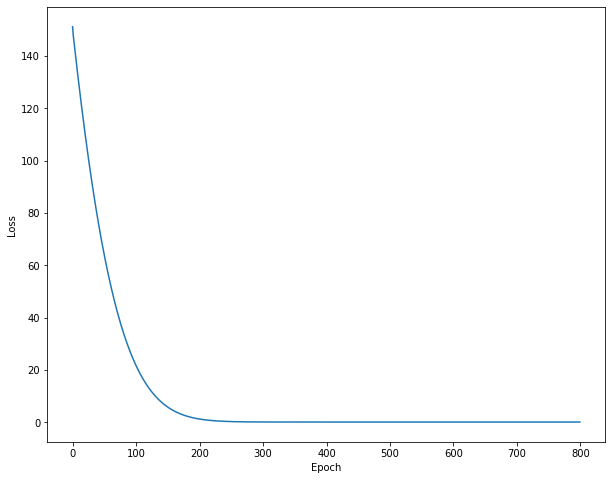

In [100]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,8))
plt.plot(range(epochs),final_losses)
plt.ylabel('Loss')
plt.xlabel('Epoch')

In [102]:
a = np.sqrt(0.15500564873218536)

In [103]:
print('Root mean squared error is :',a)

Root mean squared error is : 0.3937075675322807


In [329]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LeakyReLU,PReLU,ELU
from keras.layers import Dropout
X = df.drop(['Id','SalePrice','Unnamed: 0'],axis =1)
y = df['SalePrice']

from sklearn.model_selection import train_test_split
a_train, a_test, b_train, b_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialising the ANN
classifier = Sequential()


# Adding the input layer and the first hidden layer
classifier.add(Dense(units = 108, kernel_initializer  = 'he_uniform',activation='relu',input_dim  = 79))

# Adding the second hidden layer
classifier.add(Dense(units = 54, kernel_initializer  = 'he_uniform',activation='relu',input_dim  =  108))
#classifier.add(Dropout(0.4))
# Adding the third hidden layer
classifier.add(Dense(units = 27, kernel_initializer  = 'he_uniform',activation='relu',input_dim  = 54))
#classifier.add(Dropout(0.4))

classifier.add(Dense(units = 13, kernel_initializer  = 'he_uniform',activation='relu',input_dim  = 27))
#classifier.add(Dropout(0.4))
classifier.add(Dense(units = 6, kernel_initializer  = 'he_uniform',activation='relu',input_dim  = 13))
# Adding the output layer
classifier.add(Dense(units = 1, kernel_initializer  = 'he_uniform'))

opt = keras.optimizers.Adam(learning_rate=0.05)
classifier.compile(loss=root_mean_squared_error, optimizer=opt)
# Compiling the ANN
#classifier.compile(loss=root_mean_squared_error, optimizer='Adamax')





In [289]:
print(classifier.summary())

Model: "sequential_44"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_167 (Dense)            (None, 108)               8640      
_________________________________________________________________
dense_168 (Dense)            (None, 54)                5886      
_________________________________________________________________
dense_169 (Dense)            (None, 27)                1485      
_________________________________________________________________
dense_170 (Dense)            (None, 13)                364       
_________________________________________________________________
dense_171 (Dense)            (None, 6)                 84        
_________________________________________________________________
dense_172 (Dense)            (None, 1)                 7         
Total params: 16,466
Trainable params: 16,466
Non-trainable params: 0
_________________________________________________

In [330]:
# Fitting the ANN to the Training set
model_history=classifier.fit(a_train, b_train,validation_split=0.3, batch_size = 10, epochs = 15)

Epoch 1/15
72/72 [==============================] - 1s 8ms/step - loss: 7.4893 - val_loss: 0.4379
Epoch 2/15
72/72 [==============================] - 0s 3ms/step - loss: 0.7526 - val_loss: 0.4149
Epoch 3/15
72/72 [==============================] - 0s 3ms/step - loss: 0.5389 - val_loss: 1.3222
Epoch 4/15
72/72 [==============================] - 0s 3ms/step - loss: 0.8761 - val_loss: 0.9678
Epoch 5/15
72/72 [==============================] - 0s 3ms/step - loss: 0.5800 - val_loss: 0.3375
Epoch 6/15
72/72 [==============================] - 0s 3ms/step - loss: 0.4071 - val_loss: 0.6110
Epoch 7/15
72/72 [==============================] - 0s 3ms/step - loss: 0.6013 - val_loss: 0.5275
Epoch 8/15
72/72 [==============================] - 0s 3ms/step - loss: 0.4207 - val_loss: 0.5060
Epoch 9/15
72/72 [==============================] - 0s 3ms/step - loss: 0.5672 - val_loss: 0.1535
Epoch 10/15
72/72 [==============================] - 0s 3ms/step - loss: 0.2393 - val_loss: 0.2434
Epoch 11/15
72/72 [

In [148]:
from keras import backend as K
def root_mean_squared_error(y_true, y_pred):
        return K.sqrt(K.mean(K.square(y_pred - y_true)))

In [331]:
y_pred1 = classifier.predict(a_test)
from sklearn.metrics import accuracy_score,mean_squared_error
print('MSE:', mean_squared_error(b_test,y_pred1))
score=np.sqrt(mean_squared_error(b_test, y_pred1))
print("RMSE:" ,score)

MSE: 0.022490550466763327
RMSE: 0.14996849824800984
